In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("D:\L-4 T-1\ML\Lab\K means cluster\k-means-clustering.csv")
df.head(10)

,x,y,z
0,6,5,9
1,29,8,10
2,34,-3,-5
3,28,4,8
4,42,40,-45
5,39,39,0
6,-40,8,4
7,-3,29,-8
8,36,12,-9
9,35,11,12


In [3]:
cluster_no = int(input("Enter the no of clusters: "))

Enter the no of clusters: 3


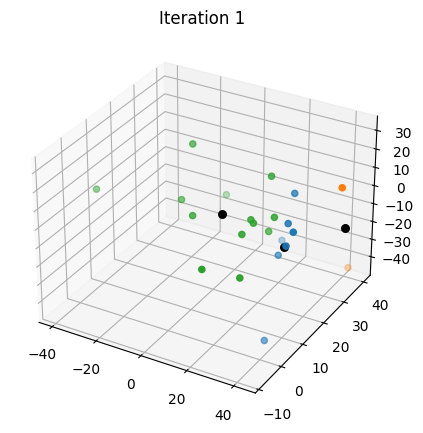

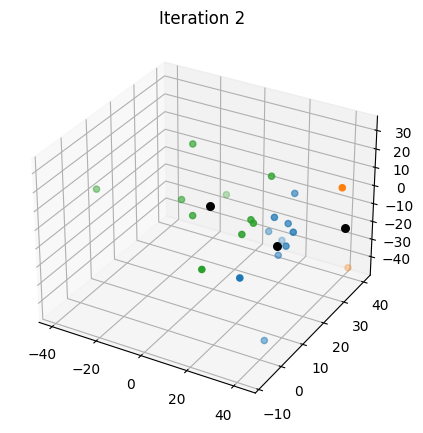

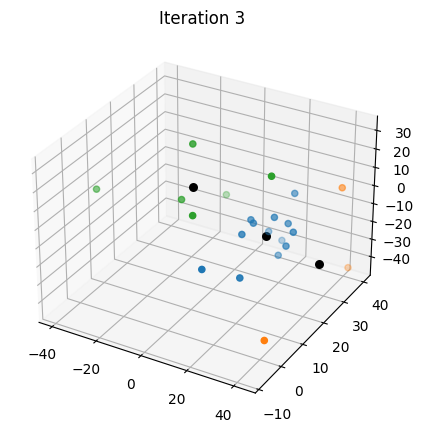

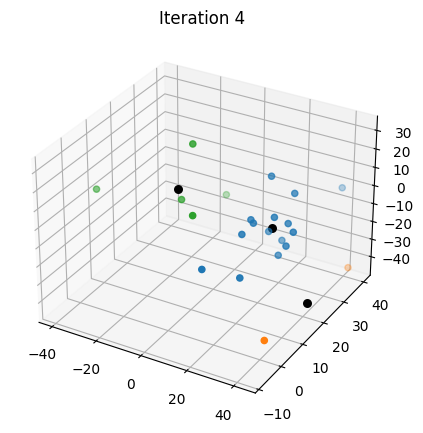

Cluster Labels: [2. 0. 0. 0. 1. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 1.]
Cluster Centers: [[ 33.33333333  11.6          4.93333333]
 [ 40.5         21.5        -44.5       ]
 [ -9.6         14.           8.6       ]]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KMeans:
    def __init__(self, cluster_no , max_iters=10, plot_steps=False):
        self.K = cluster_no
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for iteration in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            ''''if self.plot_steps:
                #self.plot(iteration + 1)'''

            centroids_old = self.centroids # new centroid calculation
            self.centroids = self._get_centroids(self.clusters)


            if self._is_converged(centroids_old, self.centroids):  # condition to check if clusters changed
                break

            if self.plot_steps:
                self.plot(iteration + 1)

        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self, iteration):
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='3d')

        for i, index in enumerate(self.clusters):
            points = self.X[index]
            ax.scatter(points[:, 0], points[:, 1], points[:, 2])

        for point in self.centroids:
            ax.scatter(point[0], point[1], point[2], marker="o", color="black", linewidth=2)

        ax.set_title("Iteration {}".format(iteration))
        plt.show()



# Extract relevant columns from the DataFrame
X = df.values

# Initialize and run K-means algorithm
k = KMeans(cluster_no=cluster_no, max_iters=10, plot_steps=True)
y_pred = k.predict(X)

# Print Cluster Labels
print("Cluster Labels:", y_pred)

# Print Cluster Centers
print("Cluster Centers:", k.centroids)
